In [1]:
# Import libraries
#from mpl_toolkits.basemap import Basemap
from io import StringIO
import math
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
import pandas as pd

# Station position info

In [2]:
data = """
Station,latitude,longitude,offset (local-UTC)
US-CF1,46.7815,-117.0821,-8
US-Srr,38.200556,-122.026358,-8
US-Var,38.41329154,-120.9507564,-8
US-CF4,46.7518,-117.1285,-8
US-Tw1,38.1074,-121.6469,-8
US-CF2,46.78404,-117.0908,-8
US-Ro6,44.6946,-93.05776,-6
US-IB1,41.8593,-88.22273,-6
US-Rwf,43.120711,-116.723086,-7
US-Bi1,38.0991538,-121.49933,-8
US-EDN,37.61562,-122.114,-8
US-Myb,38.049782,-121.76506,-8
US-Rms,43.0645,-116.7486,-7
US-Ro4,44.6781,-93.0723,-6
US-Rws,43.167545,-116.713205,-7
US-Snf,38.04021364,-121.7271912,-8
US-Tw4,38.10274361,-121.6413286,-8
CA-ER1,43.640458,-80.412303,-5
US-Ro5,44.691,-93.0576,-6
US-Bi2,38.1090707,-121.5350925,-8
US-IB2,41.84062,-88.24103,-6
US-CF3,46.7551,-117.1261,-8
US-Sne,38.0369,-121.7547,-8
US-SRS,31.817294,-110.850801,-7
US-StJ,39.08821106,-75.43722534,-5
US-Rls,43.1439,-116.7356,-7
US-ONA,27.3836,-81.9509,-5
"""

# Read the data into a pandas DataFrame
df_station_loc = pd.read_csv(StringIO(data))

# Create a list with the specified station IDs and locations
station_ids = [2,       3,       4,       5,       6,       7,       9,       10,   
               12,      14,      15,      17,      19,      20,      21,      22,   
               23,      24,      25,      26,      27,      28,      29,      30,   
               31,      33,      35]
location    = ["US-WA", "US-CA", "US-CA", "US-WA", "US-CA", "US-WA", "US-MN", "US-IL", 
               "US-ID", "US-CA", "US-CA", "US-CA", "US-ID", "US-MN", "US-ID", "US-CA", 
               "US-CA", "CA-ON", "US-MN", "US-CA", "US-IL", "US-WA", "US-CA", "US-AZ", 
               "US-DE", "US-ID", "US-FL"]

# Fill the rest of the list with NaN or any placeholder you prefer
station_ids.extend([None] * (len(df_station_loc) - len(station_ids)))
location.extend([None] * (len(df_station_loc) - len(location)))

# Add the station_id column to the DataFrame
df_station_loc['station_id'] = station_ids
df_station_loc['location'] = location

# Display the DataFrame
print(df_station_loc)
num_unique_locations = df_station_loc['location'].nunique()
print("number of different locations:", num_unique_locations)

   Station   latitude   longitude  offset (local-UTC)  station_id location
0   US-CF1  46.781500 -117.082100                  -8           2    US-WA
1   US-Srr  38.200556 -122.026358                  -8           3    US-CA
2   US-Var  38.413292 -120.950756                  -8           4    US-CA
3   US-CF4  46.751800 -117.128500                  -8           5    US-WA
4   US-Tw1  38.107400 -121.646900                  -8           6    US-CA
5   US-CF2  46.784040 -117.090800                  -8           7    US-WA
6   US-Ro6  44.694600  -93.057760                  -6           9    US-MN
7   US-IB1  41.859300  -88.222730                  -6          10    US-IL
8   US-Rwf  43.120711 -116.723086                  -7          12    US-ID
9   US-Bi1  38.099154 -121.499330                  -8          14    US-CA
10  US-EDN  37.615620 -122.114000                  -8          15    US-CA
11  US-Myb  38.049782 -121.765060                  -8          17    US-CA
12  US-Rms  43.064500 -11

# Show station location

['US-WA' 'US-CA' 'US-MN' 'US-IL' 'US-ID' 'CA-ON' 'US-AZ' 'US-DE' 'US-FL']


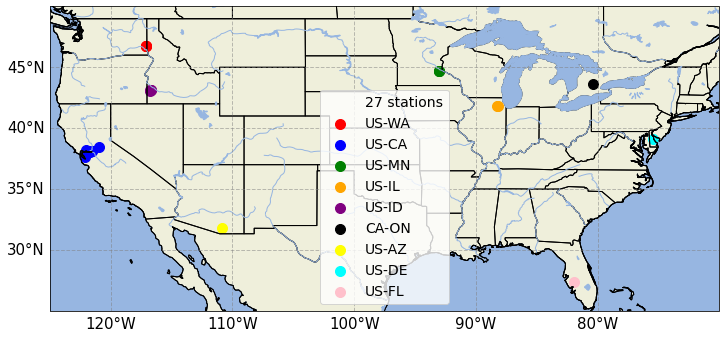

In [8]:

# Get unique locations
unique_locations = df_station_loc['location'].unique()
print(unique_locations)

# Define colors for each location
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'yellow', 'cyan', 'pink']

# Create a new figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map to cover the US
ax.set_extent([-125, -70, 25, 50], crs=ccrs.PlateCarree())


# Add coastlines and countries for context
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)

# Add longitude and latitude lines with labels
gridlines = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gridlines.top_labels = False
gridlines.right_labels = False
# make the labels for lon and lat bigger
gridlines.xlabel_style = {'size': 15}
gridlines.ylabel_style = {'size': 15}


# Plot stations for each location
for i, location in enumerate(unique_locations):
    location_data = df_station_loc[df_station_loc['location'] == location]
    color = colors[i % len(colors)]  # Cycle through colors if more locations than colors
    ax.scatter(location_data['longitude'], location_data['latitude'], color=color, 
               label=location, s=100, transform=ccrs.PlateCarree())
    
# mention that there are 27 stations
plt.plot([], [], ' ', label="27 stations")
   

    
# Add legend
plt.legend(loc='lower center', fontsize=14)

plt.savefig('stations_locations.pdf', bbox_inches='tight')

# Show the plot
plt.show()